In [1]:
import pandas as pd 
df=pd.read_csv("jobs_database_nettoye.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


For k=2, Silhouette Score: 0.02161090532498382
For k=3, Silhouette Score: 0.026500719096951238
For k=4, Silhouette Score: 0.03761496781284455
For k=5, Silhouette Score: 0.046451432812088536
For k=6, Silhouette Score: 0.05604137940663499
For k=7, Silhouette Score: 0.05652471255828431
For k=8, Silhouette Score: 0.06770636398902898
For k=9, Silhouette Score: 0.07257718875444448
For k=10, Silhouette Score: 0.08052005610693196
For k=11, Silhouette Score: 0.08193297318272177
For k=12, Silhouette Score: 0.08837880084511299
For k=13, Silhouette Score: 0.09956024559438922
For k=14, Silhouette Score: 0.10699199423620352
For k=15, Silhouette Score: 0.11996140954190125
For k=16, Silhouette Score: 0.12214934302806962
For k=17, Silhouette Score: 0.1301816708116491
For k=18, Silhouette Score: 0.13943453196923894
For k=19, Silhouette Score: 0.14988080937647189
For k=20, Silhouette Score: 0.15962624517006155
For k=21, Silhouette Score: 0.14312248580578907
For k=22, Silhouette Score: 0.14809015087959684

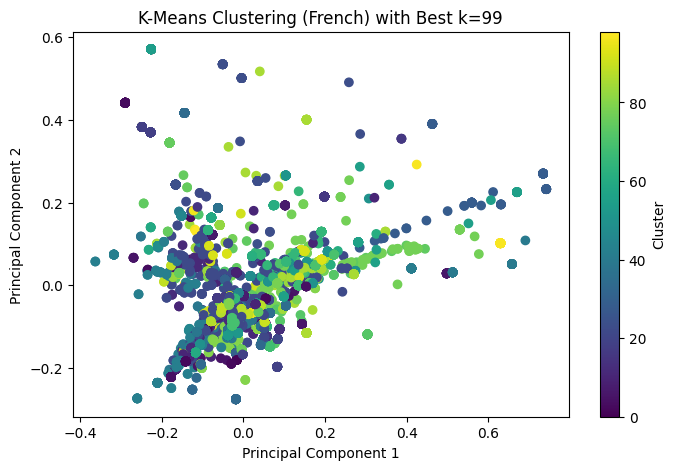

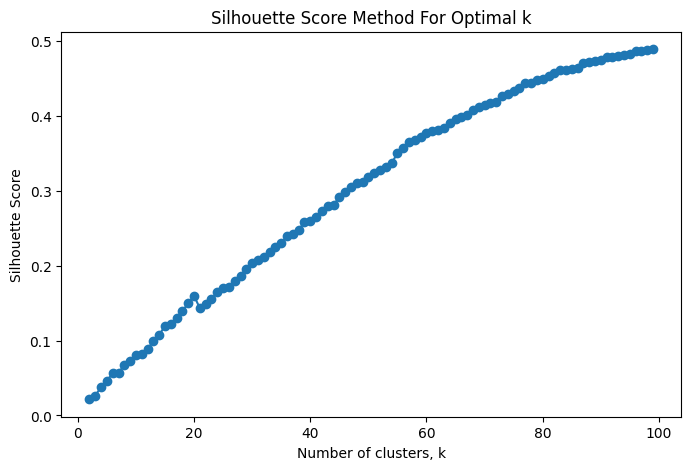

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

df=pd.read_csv("jobs_database_nettoye.csv")
# Télécharger les stop words en français
nltk.download('stopwords')

# Définir les stop words en français comme une liste
french_stop_words = list(stopwords.words('french'))

# Utiliser les stop words dans TfidfVectorizer
vectorizer_fr = TfidfVectorizer(stop_words=french_stop_words)
X_fr = vectorizer_fr.fit_transform(df['Job Title'].fillna(''))

# Définir une plage de valeurs pour k
k_range = range(2, 100)
silhouette_scores = []

# Calculer le score de silhouette pour chaque valeur de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_fr)
    silhouette_avg = silhouette_score(X_fr, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k={k}, Silhouette Score: {silhouette_avg}")

# Trouver le k avec le meilleur score de silhouette
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]

# Appliquer K-Means avec le meilleur k
kmeans_fr_best = KMeans(n_clusters=best_k, random_state=42)
df['kmeans_cluster'] = kmeans_fr_best.fit_predict(X_fr)

# Réduction de la dimensionnalité à 2D avec PCA
pca = PCA(n_components=2)
X_fr_pca = pca.fit_transform(X_fr.toarray())

# Visualisation des résultats de clustering K-Means
plt.figure(figsize=(8, 5))
plt.scatter(X_fr_pca[:, 0], X_fr_pca[:, 1], c=df['kmeans_cluster'], cmap='viridis')
plt.title(f'K-Means Clustering (French) with Best k={best_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Tracer les scores de silhouette
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score Method For Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


For k=2, Silhouette Score: 0.025097860743539337
For k=3, Silhouette Score: 0.03932579072090269
For k=4, Silhouette Score: 0.04532439581866935
For k=5, Silhouette Score: 0.06289278710292766
For k=6, Silhouette Score: 0.069990093774253
For k=7, Silhouette Score: 0.07458254862613306
For k=8, Silhouette Score: 0.0776145280338747
For k=9, Silhouette Score: 0.08906412030862393
For k=10, Silhouette Score: 0.09963632785022057
For k=11, Silhouette Score: 0.10299582783378387
For k=12, Silhouette Score: 0.10899580526314576
For k=13, Silhouette Score: 0.11655966272207968
For k=14, Silhouette Score: 0.1254256187088652
For k=15, Silhouette Score: 0.12547156604428747
For k=16, Silhouette Score: 0.13955821366655738
For k=17, Silhouette Score: 0.14002919788040455
For k=18, Silhouette Score: 0.14869402927424263
For k=19, Silhouette Score: 0.14879677521016801
For k=20, Silhouette Score: 0.1691119374842654
For k=21, Silhouette Score: 0.173817113059746
For k=22, Silhouette Score: 0.18220646116555544
For k=

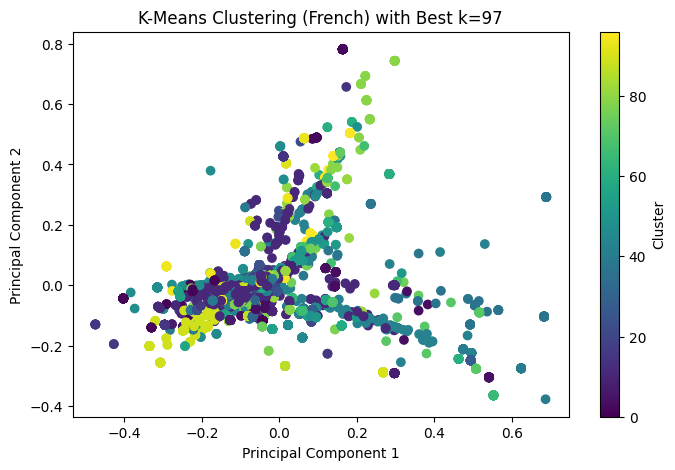

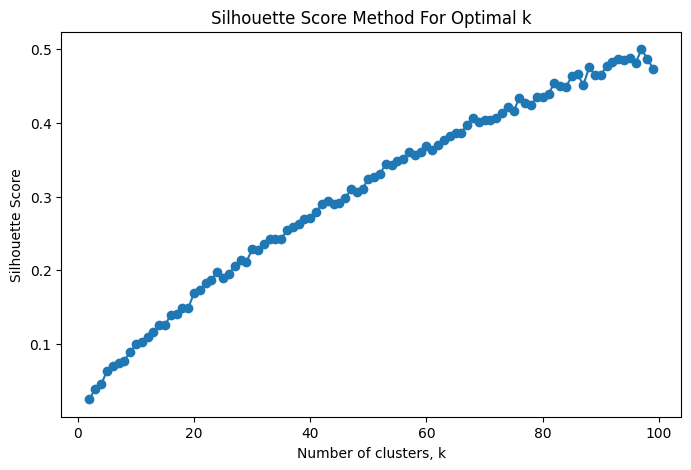

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer


df=pd.read_csv("jobs_database_nettoye.csv")
# Télécharger les ressources nécessaires
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Définir les stop words en français
french_stop_words = set(stopwords.words('french'))

# Initialiser lemmatiser et stemmer
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("french")

def preprocess_text(text):
    words = nltk.word_tokenize(text.lower(), language='french')
    words = [word for word in words if word.isalpha() and word not in french_stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatisation
    words = [stemmer.stem(word) for word in words]  # Stemming
    return " ".join(words)

# Appliquer la vectorisation avec prétraitement
vectorizer_fr = TfidfVectorizer(preprocessor=preprocess_text)
X_fr = vectorizer_fr.fit_transform(df['Job Title'].fillna(''))

# Définir une plage de valeurs pour k
k_range = range(2, 100)
silhouette_scores = []

# Calculer le score de silhouette pour chaque valeur de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_fr)
    silhouette_avg = silhouette_score(X_fr, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k={k}, Silhouette Score: {silhouette_avg}")

# Trouver le k avec le meilleur score de silhouette
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]

# Appliquer K-Means avec le meilleur k
kmeans_fr_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans_fr_best.fit_predict(X_fr)

# Réduction de la dimensionnalité à 2D avec PCA
pca = PCA(n_components=2)
X_fr_pca = pca.fit_transform(X_fr.toarray())

# Visualisation des résultats de clustering K-Means
plt.figure(figsize=(8, 5))
plt.scatter(X_fr_pca[:, 0], X_fr_pca[:, 1], c=df['kmeans_cluster'], cmap='viridis')
plt.title(f'K-Means Clustering (French) with Best k={best_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Tracer les scores de silhouette
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score Method For Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


For k=2, Silhouette Score: 0.025097860743539337
For k=3, Silhouette Score: 0.03932579072090269
For k=4, Silhouette Score: 0.04532439581866935
For k=5, Silhouette Score: 0.06289278710292766
For k=6, Silhouette Score: 0.069990093774253
For k=7, Silhouette Score: 0.07458254862613306
For k=8, Silhouette Score: 0.0776145280338747
For k=9, Silhouette Score: 0.08906412030862393
For k=10, Silhouette Score: 0.09963632785022057
For k=11, Silhouette Score: 0.10299582783378387
For k=12, Silhouette Score: 0.10899580526314576
For k=13, Silhouette Score: 0.11655966272207968
For k=14, Silhouette Score: 0.1254256187088652
For k=15, Silhouette Score: 0.12547156604428747
For k=16, Silhouette Score: 0.13955821366655738
For k=17, Silhouette Score: 0.14002919788040455
For k=18, Silhouette Score: 0.14869402927424263
For k=19, Silhouette Score: 0.14879677521016801


C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


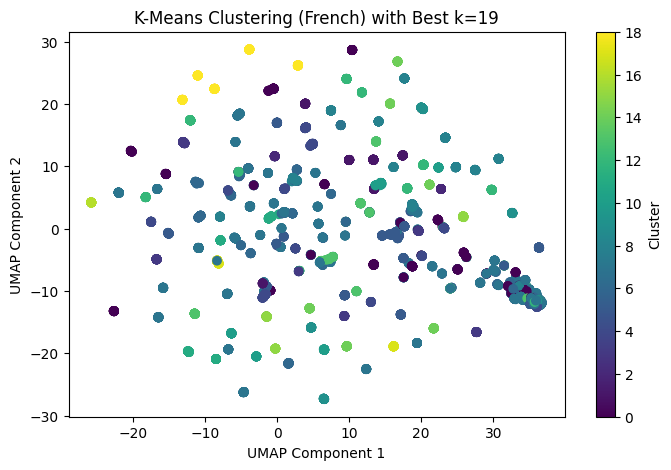

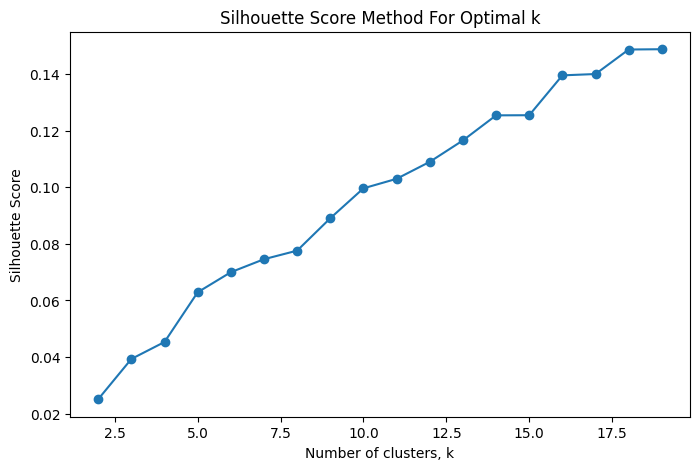

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import umap
import pandas as pd

df=pd.read_csv("jobs_database_nettoye.csv")
# Télécharger les ressources nécessaires
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Définir les stop words en français
french_stop_words = set(stopwords.words('french'))

# Initialiser lemmatiser et stemmer
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("french")

def preprocess_text(text):
    words = nltk.word_tokenize(text.lower(), language='french')
    words = [word for word in words if word.isalpha() and word not in french_stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatisation
    words = [stemmer.stem(word) for word in words]  # Stemming
    return " ".join(words)
# Appliquer la vectorisation avec prétraitement
vectorizer_fr = TfidfVectorizer(preprocessor=preprocess_text)
X_fr = vectorizer_fr.fit_transform(df['Job Title'].fillna(''))

# Définir une plage de valeurs pour k
k_range = range(2, 20)
silhouette_scores = []

# Calculer le score de silhouette pour chaque valeur de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_fr)
    silhouette_avg = silhouette_score(X_fr, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k={k}, Silhouette Score: {silhouette_avg}")

# Trouver le k avec le meilleur score de silhouette
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]

# Appliquer K-Means avec le meilleur k
kmeans_fr_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans_fr_best.fit_predict(X_fr)

# Réduction de la dimensionnalité avec UMAP
reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, n_jobs=-1)
X_fr_umap = reducer.fit_transform(X_fr.toarray())

# Visualisation des résultats de clustering K-Means
plt.figure(figsize=(8, 5))
plt.scatter(X_fr_umap[:, 0], X_fr_umap[:, 1], c=df['kmeans_cluster'], cmap='viridis')
plt.title(f'K-Means Clustering (French) with Best k={best_k}')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Tracer les scores de silhouette
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score Method For Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Silhouette Score: 0.11992326051134655
Nombre de clusters identifiés par HDBSCAN: 18


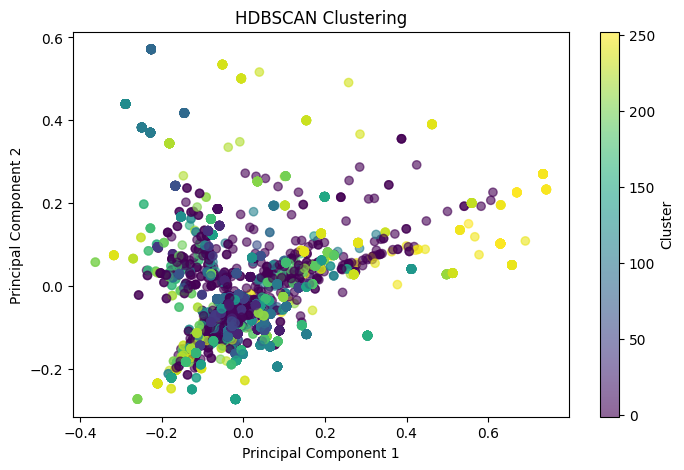

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import hdbscan
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

df=pd.read_csv("jobs_database_nettoye.csv")

# Télécharger les stop words en français
nltk.download('stopwords')

# Définir les stop words en français comme une liste
french_stop_words = list(stopwords.words('french'))

# Utiliser les stop words dans TfidfVectorizer
vectorizer_fr = TfidfVectorizer(stop_words=french_stop_words)
X_fr = vectorizer_fr.fit_transform(df['Job Title'].fillna(''))

# Appliquer HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1)
df['hdbscan_cluster'] = hdbscan_clusterer.fit_predict(X_fr)

# Filtrer les points de bruit (label -1) pour le calcul du silhouette score
valid_indices = cluster_labels != -1
X_fr_valid = X_fr[valid_indices]
cluster_labels_valid = cluster_labels[valid_indices]

# Calculer le silhouette score
if len(set(cluster_labels_valid)) > 1:  # Vérifier qu'il y a plus d'un cluster
    silhouette_avg = silhouette_score(X_fr_valid, cluster_labels_valid)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Pas assez de clusters pour calculer le silhouette score.")

unique_clusters = set(cluster_labels)
num_clusters = len(unique_clusters) - 1  # Soustraire 1 pour exclure le bruit (-1)
print(f"Nombre de clusters identifiés par HDBSCAN: {num_clusters}")

# Réduction de la dimensionnalité à 2D avec PCA
pca = PCA(n_components=2)
X_fr_pca = pca.fit_transform(X_fr.toarray())

# Visualisation des résultats de clustering HDBSCAN
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X_fr_pca[:, 0], X_fr_pca[:, 1], c=df['hdbscan_cluster'], cmap='viridis', alpha=0.6)
plt.title('HDBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show() 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Silhouette Score: 0.8542794162250485
Nombre de clusters identifiés par HDBSCAN: 253


C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


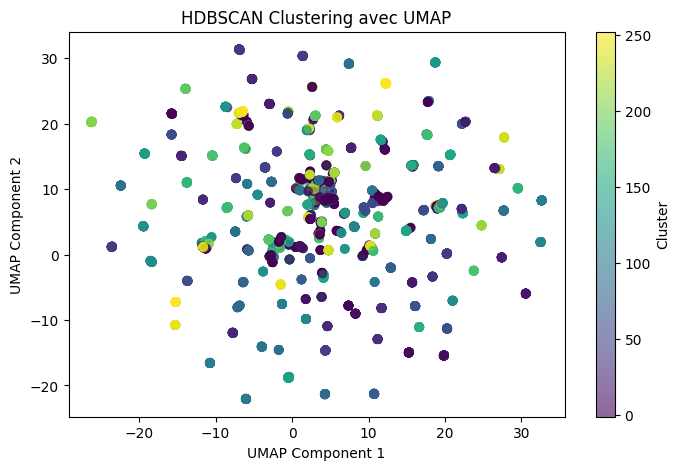

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import hdbscan
import matplotlib.pyplot as plt
import umap
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import silhouette_score
import pandas as pd


df=pd.read_csv("jobs_database_nettoye.csv")
# Télécharger les stop words en français
nltk.download('stopwords')

# Définir les stop words en français comme une liste
french_stop_words = list(stopwords.words('french'))

# Utiliser les stop words dans TfidfVectorizer
vectorizer_fr = TfidfVectorizer(stop_words=french_stop_words)
X_fr = vectorizer_fr.fit_transform(df['Job Title'].fillna(''))

# Appliquer HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1)
df['hdbscan_cluster'] = hdbscan_clusterer.fit_predict(X_fr)

# Filtrer les points de bruit (label -1) pour le calcul du silhouette score
cluster_labels = df['hdbscan_cluster'].values
valid_indices = cluster_labels != -1
X_fr_valid = X_fr[valid_indices]
cluster_labels_valid = cluster_labels[valid_indices]

# Calculer le silhouette score si possible
if len(set(cluster_labels_valid)) > 1:  # Vérifier qu'il y a plus d'un cluster
    silhouette_avg = silhouette_score(X_fr_valid, cluster_labels_valid)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Pas assez de clusters pour calculer le silhouette score.")

# Nombre de clusters détectés
unique_clusters = set(cluster_labels)
num_clusters = len(unique_clusters) - 1  # Soustraire 1 pour exclure le bruit (-1)
print(f"Nombre de clusters identifiés par HDBSCAN: {num_clusters}")

# Réduction de la dimensionnalité à 2D avec UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_fr_umap = reducer.fit_transform(X_fr.toarray())

# Visualisation des résultats de clustering HDBSCAN
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X_fr_umap[:, 0], X_fr_umap[:, 1], c=df['hdbscan_cluster'], cmap='viridis', alpha=0.6)
plt.title('HDBSCAN Clustering avec UMAP')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import hdbscan
import matplotlib.pyplot as plt
import umap.umap_ as umap
import pandas as pd
from sklearn.metrics import silhouette_score

df=pd.read_csv("jobs_database_nettoye.csv")

# Télécharger les ressources nécessaires
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Définir les stopwords en français
stop_words = set(stopwords.words("french"))

# Initialiser lemmatiser et stemmer
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("french")

# Fonction de prétraitement avec lemmatisation et stemming
def preprocess_text(text):
    words = nltk.word_tokenize(text.lower(), language='french')
    words = [word for word in words if word.isalpha() and word not in stop_words]  # Suppression des stopwords & caractères non alphabétiques
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatisation
    words = [stemmer.stem(word) for word in words]  # Stemming
    return " ".join(words)

# Charger le dataset (supposant que df['Job Title'] existe)
vectorizer_fr = TfidfVectorizer(preprocessor=preprocess_text)
X_fr = vectorizer_fr.fit_transform(df['Job Title'].fillna(''))

# Appliquer le clustering HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1)
df['hdbscan_cluster'] = hdbscan_clusterer.fit_predict(X_fr)

# Filtrer les points de bruit (-1) pour le calcul du score de silhouette
cluster_labels = df['hdbscan_cluster'].values
valid_indices = cluster_labels != -1
X_fr_valid = X_fr[valid_indices]
cluster_labels_valid = cluster_labels[valid_indices]

# Calculer le score de silhouette si plusieurs clusters existent
if len(set(cluster_labels_valid)) > 1:
    silhouette_avg = silhouette_score(X_fr_valid, cluster_labels_valid)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Pas assez de clusters pour calculer le score de silhouette.")

# Afficher le nombre de clusters détectés
unique_clusters = set(cluster_labels)
num_clusters = len(unique_clusters) - 1  # Exclure le bruit (-1)
print(f"Nombre de clusters identifiés par HDBSCAN: {num_clusters}")

# Réduction de la dimensionnalité avec UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_fr_umap = umap_reducer.fit_transform(X_fr.toarray())

# Visualisation du clustering HDBSCAN avec UMAP
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X_fr_umap[:, 0], X_fr_umap[:, 1], c=df['hdbscan_cluster'], cmap='viridis', alpha=0.6)
plt.title('HDBSCAN Clustering avec UMAP (Lemmatization & Stemming)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
pd.set_option('display.max_rows', None)
df
